## Data Source

https://api.covid19india.org/

## Import libraries

In [2]:
# to get web contents
import requests
# to parse json contents
import json
# to parse csv files
import csv

# for numerical operations
import numpy as np
# to store and analysis data in dataframes
import pandas as pd

## Get data

### df_1 - Till Apr 19

In [3]:
# df_1 - Till Apr 19
# ==================

# get response from the web page
response = requests.get('https://api.covid19india.org/raw_data1.json')
# get contents from the response
content = response.content
# parse the json file
parsed = json.loads(content)
# keys
parsed.keys()

dict_keys(['raw_data'])

In [4]:
# save to df
df_1 = pd.DataFrame(parsed['raw_data'])

# shape of the dataframe
print(df_1.shape)

# # list of columns
print(df_1.columns)

# # first few rows
# df_1.head(2)

(17364, 21)
Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'numcases', 'patientnumber', 'source1', 'source2', 'source3',
       'statecode', 'statepatientnumber', 'statuschangedate',
       'typeoftransmission'],
      dtype='object')


### df_2 - Till Apr 26

In [5]:
# df_2 - Till Apr 26
# ==================

# get response from the web page
response = requests.get('https://api.covid19india.org/raw_data2.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['raw_data'])

In [6]:
# save to df
df_2 = pd.DataFrame(parsed['raw_data'])

# shape of the dataframe
print(df_2.shape)

# # list of columns
print(df_2.columns)

# # first few rows
# df_2.head(2)

(10819, 21)
Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'numcases', 'patientnumber', 'source1', 'source2', 'source3',
       'statecode', 'statepatientnumber', 'statuschangedate',
       'typeoftransmission'],
      dtype='object')


### df_3 - Live

In [7]:
# df_3 - Live
# ===========

# get response from the web page
response = requests.get('https://api.covid19india.org/raw_data3.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['raw_data'])

In [8]:
# save to df
df_3 = pd.DataFrame(parsed['raw_data'])

# shape of the dataframe
print(df_3.shape)

# # list of columns
print(df_3.columns)

# # first few rows
# df_3.head(2)

(10012, 20)
Index(['agebracket', 'contractedfromwhichpatientsuspected', 'currentstatus',
       'dateannounced', 'detectedcity', 'detecteddistrict', 'detectedstate',
       'entryid', 'gender', 'nationality', 'notes', 'numcases',
       'patientnumber', 'source1', 'source2', 'source3', 'statecode',
       'statepatientnumber', 'statuschangedate', 'typeoftransmission'],
      dtype='object')


In [8]:
# np.setdiff1d(df_1.columns, df_3.columns)

### full data

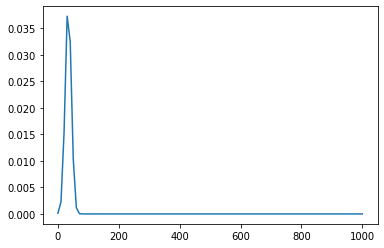

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
mu = 34
std = 10
x = np.linspace(start=0, stop=1000, num=100)
y = stats.norm.pdf(x, mu, std) 
plt.plot(x, y)
plt.show()

In [22]:
# df_3[['entryid', 'patientnumber']]

In [ ]:
# concatenate data
df = pd.concat([df_1, df_2, df_3])

# shape of the data
df.shape

In [ ]:
# list of columns
df.columns

In [13]:
# first 3 rows of the dataframe
df.head(3)

,agebracket,backupnotes,contractedfromwhichpatientsuspected,currentstatus,dateannounced,detectedcity,detecteddistrict,detectedstate,estimatedonsetdate,gender,...,notes,numcases,patientnumber,source1,source2,source3,statecode,statepatientnumber,statuschangedate,typeoftransmission
0,20,Student from Wuhan,,Recovered,30/01/2020,Thrissur,Thrissur,Kerala,,F,...,Travelled from Wuhan,1,1,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-TS-P1,14/02/2020,Imported
1,,Student from Wuhan,,Recovered,02/02/2020,Alappuzha,Alappuzha,Kerala,,,...,Travelled from Wuhan,1,2,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,KL,KL-AL-P1,14/02/2020,Imported
2,,Student from Wuhan,,Recovered,03/02/2020,Kasaragod,Kasaragod,Kerala,,,...,Travelled from Wuhan,1,3,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,KL,KL-KS-P1,14/02/2020,Imported


In [14]:
# creating patient id column from patient number
# ===============================================

df['p_id'] = df['patientnumber'].apply(lambda x : 'P'+str(x))
df.columns

Index(['agebracket', 'backupnotes', 'contractedfromwhichpatientsuspected',
       'currentstatus', 'dateannounced', 'detectedcity', 'detecteddistrict',
       'detectedstate', 'estimatedonsetdate', 'gender', 'nationality', 'notes',
       'numcases', 'patientnumber', 'source1', 'source2', 'source3',
       'statecode', 'statepatientnumber', 'statuschangedate',
       'typeoftransmission', 'p_id'],
      dtype='object')

## Rearrange and rename columns

In [15]:
# order of columns
cols = ['patientnumber', 'p_id', 'statepatientnumber', 
        'dateannounced', 'agebracket', 'gender', 
        'detectedcity', 'detecteddistrict', 'detectedstate', 'statecode', 'nationality',
        'typeoftransmission', 'contractedfromwhichpatientsuspected',
        'statuschangedate', 'currentstatus', 'estimatedonsetdate',
        'source1', 'source2', 'source3', 'notes', 'backupnotes']

# rearrange columns
df = df[cols]

# rename columns
df.columns = ['patient_number', 'p_id', 'state_patient_number', 
              'date_announced', 'age_bracket', 'gender', 
              'detected_city', 'detected_district', 'detected_state', 'state_code', 'nationality',
              'type_of_transmission', 'contracted_from_which_patient_suspected',
              'status_change_date', 'current_status', 'estimated_onset_date',
              'source1', 'source2', 'source3', 'notes', 'backup_notes']

# dataframe shape
df.shape

(38195, 21)

In [16]:
# first 3 rows of the dataframe
df.head(3)

,patient_number,p_id,state_patient_number,date_announced,age_bracket,gender,detected_city,detected_district,detected_state,state_code,...,type_of_transmission,contracted_from_which_patient_suspected,status_change_date,current_status,estimated_onset_date,source1,source2,source3,notes,backup_notes
0,1,P1,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,KL,...,Imported,,14/02/2020,Recovered,,https://twitter.com/vijayanpinarayi/status/122...,https://weather.com/en-IN/india/news/news/2020...,,Travelled from Wuhan,Student from Wuhan
1,2,P2,KL-AL-P1,02/02/2020,,,Alappuzha,Alappuzha,Kerala,KL,...,Imported,,14/02/2020,Recovered,,https://www.indiatoday.in/india/story/kerala-r...,https://weather.com/en-IN/india/news/news/2020...,,Travelled from Wuhan,Student from Wuhan
2,3,P3,KL-KS-P1,03/02/2020,,,Kasaragod,Kasaragod,Kerala,KL,...,Imported,,14/02/2020,Recovered,,https://www.indiatoday.in/india/story/kerala-n...,https://twitter.com/ANI/status/122422148580539...,https://weather.com/en-IN/india/news/news/2020...,Travelled from Wuhan,Student from Wuhan


## Missing values

In [17]:
# no. of empty values in each column
# ==================================

print(df.shape, '\n')

for i in df.columns:
    print(i, '\t', df[df[i]==''].shape[0])

(38195, 21) 

patient_number 	 296
p_id 	 0
state_patient_number 	 30061
date_announced 	 0
age_bracket 	 30666
gender 	 28228
detected_city 	 35424
detected_district 	 7066
detected_state 	 7
state_code 	 7
nationality 	 35486
type_of_transmission 	 35205
contracted_from_which_patient_suspected 	 36316
status_change_date 	 10415
current_status 	 0
estimated_onset_date 	 28183
source1 	 733
source2 	 34242
source3 	 37712
notes 	 9422
backup_notes 	 27822


In [18]:
# no. of non-empty values in each column
# ===================================

print(df.shape, '\n')

for i in df.columns:
    print(i, '\t', df[df[i]!=''].shape[0])

(38195, 21) 

patient_number 	 37899
p_id 	 38195
state_patient_number 	 8134
date_announced 	 38195
age_bracket 	 7529
gender 	 9967
detected_city 	 2771
detected_district 	 31129
detected_state 	 38188
state_code 	 38188
nationality 	 2709
type_of_transmission 	 2990
contracted_from_which_patient_suspected 	 1879
status_change_date 	 27780
current_status 	 38195
estimated_onset_date 	 10012
source1 	 37462
source2 	 3953
source3 	 483
notes 	 28773
backup_notes 	 10373


In [19]:
# replacing empty strings with np.nan
# ==================================-

print(df.shape)

df = df.replace(r'', np.nan, regex=True)
df.isna().sum()

(38195, 21)


patient_number                               296
p_id                                           0
state_patient_number                       30061
date_announced                                 0
age_bracket                                30666
gender                                     28228
detected_city                              35424
detected_district                           7066
detected_state                                 7
state_code                                     7
nationality                                35486
type_of_transmission                       35205
contracted_from_which_patient_suspected    36316
status_change_date                         10415
current_status                                 0
estimated_onset_date                       38195
source1                                      733
source2                                    34242
source3                                    37712
notes                                       9422
backup_notes        

In [20]:
# droping empty rows (row with just row number but without patient entry
# ======================================================================

print(df.shape)

# df.dropna(subset=['detected_state'], inplace=True)

print(df.shape)
df.isna().sum()

(38195, 21)
(38195, 21)


patient_number                               296
p_id                                           0
state_patient_number                       30061
date_announced                                 0
age_bracket                                30666
gender                                     28228
detected_city                              35424
detected_district                           7066
detected_state                                 7
state_code                                     7
nationality                                35486
type_of_transmission                       35205
contracted_from_which_patient_suspected    36316
status_change_date                         10415
current_status                                 0
estimated_onset_date                       38195
source1                                      733
source2                                    34242
source3                                    37712
notes                                       9422
backup_notes        

## Save data

In [21]:
# save to csv`
df.to_csv('patients_data.csv', index=False)

# State tested data

In [22]:
# get response from the web page
response = requests.get('https://api.covid19india.org/state_test_data.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['states_tested_data'])

In [23]:
# save data in a dataframe
th = pd.DataFrame(parsed['states_tested_data'])

# first few rows
th.tail(3)

,coronaenquirycalls,cumulativepeopleinquarantine,negative,numcallsstatehelpline,numicubeds,numisolationbeds,numventilators,populationncp2019projection,positive,source1,...,tagtotaltested,testpositivityrate,testspermillion,testsperpositivecase,testsperthousand,totalpeoplecurrentlyinquarantine,totalpeoplereleasedfromquarantine,totaltested,unconfirmed,updatedon
1262,,,,,907,,392,96906000,2825,https://www.wbhealth.gov.in/uploaded_files/cor...,...,Tested,3.02%,235693,33,235.69,11571,29615,93570,,18/05/2020
1263,,,,,907,,392,96906000,2961,https://www.wbhealth.gov.in/uploaded_files/cor...,...,Tested,2.89%,257637,35,257.64,12482,32112,102282,,19/05/2020
1264,,,,,907,,392,96906000,3103,https://www.wbhealth.gov.in/uploaded_files/cor...,...,Tested,2.80%,279602,36,279.60,12661,34104,111002,,20/05/2020


In [24]:
th.columns

Index(['coronaenquirycalls', 'cumulativepeopleinquarantine', 'negative',
       'numcallsstatehelpline', 'numicubeds', 'numisolationbeds',
       'numventilators', 'populationncp2019projection', 'positive', 'source1',
       'source2', 'state', 'tagpeopleinquarantine', 'tagtotaltested',
       'testpositivityrate', 'testspermillion', 'testsperpositivecase',
       'testsperthousand', 'totalpeoplecurrentlyinquarantine',
       'totalpeoplereleasedfromquarantine', 'totaltested', 'unconfirmed',
       'updatedon'],
      dtype='object')

In [25]:
len(th.columns)

23

In [26]:
# save to csv`
th.to_csv('tests_latest_state_level.csv', index=False)

## Zones

In [27]:
# get response from the web page
response = requests.get('https://api.covid19india.org/zones.json')

# get contents from the response
content = response.content

# parse the json file
parsed = json.loads(content)

# keys
parsed.keys()

dict_keys(['zones'])

In [28]:
zo = pd.DataFrame(parsed['zones'])
zo.head(3)

,district,districtcode,lastupdated,source,state,statecode,zone
0,Nicobars,AN_Nicobars,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
1,North and Middle Andaman,AN_North and Middle Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Green
2,South Andaman,AN_South Andaman,01/05/2020,https://www.facebook.com/airnewsalerts/photos/...,Andaman and Nicobar Islands,AN,Red


In [29]:
# save to csv`
zo.to_csv('zones.csv', index=False)

## National level daily

In [30]:
response = requests.get('https://api.covid19india.org/data.json')
content = response.content
parsed = json.loads(content)
parsed.keys()

dict_keys(['cases_time_series', 'statewise', 'tested'])

In [31]:
national = pd.DataFrame(parsed['cases_time_series'])
national.head()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered
0,1,0,0,30 January,1,0,0
1,0,0,0,31 January,1,0,0
2,0,0,0,01 February,1,0,0
3,1,0,0,02 February,2,0,0
4,1,0,0,03 February,3,0,0


In [32]:
national.columns

Index(['dailyconfirmed', 'dailydeceased', 'dailyrecovered', 'date',
       'totalconfirmed', 'totaldeceased', 'totalrecovered'],
      dtype='object')

In [33]:
national = national[['date', 'totalconfirmed', 'totaldeceased', 'totalrecovered', 
                     'dailyconfirmed', 'dailydeceased', 'dailyrecovered']]
national.head()

,date,totalconfirmed,totaldeceased,totalrecovered,dailyconfirmed,dailydeceased,dailyrecovered
0,30 January,1,0,0,1,0,0
1,31 January,1,0,0,0,0,0
2,01 February,1,0,0,0,0,0
3,02 February,2,0,0,1,0,0
4,03 February,3,0,0,1,0,0


In [34]:
# save to csv`
national.to_csv('nation_level_daily.csv', index=False)

## National level latest

In [35]:
state_level = pd.DataFrame(parsed['statewise'])
state_level.head()

,active,confirmed,deaths,deltaconfirmed,deltadeaths,deltarecovered,lastupdatedtime,recovered,state,statecode,statenotes
0,66308,118452,3584,226,0,0,22/05/2020 09:23:23,48553,Total,TT,
1,28462,41642,1454,0,0,0,21/05/2020 23:09:24,11726,Maharashtra,MH,
2,7590,13967,95,0,0,0,21/05/2020 18:57:24,6282,Tamil Nadu,TN,
3,6649,12910,773,0,0,0,21/05/2020 20:33:26,5488,Gujarat,GJ,
4,5898,11659,194,0,0,0,21/05/2020 15:37:24,5567,Delhi,DL,[10-May]<br>\n\nDelhi will be releasing bullet...


In [36]:
state_level.columns

Index(['active', 'confirmed', 'deaths', 'deltaconfirmed', 'deltadeaths',
       'deltarecovered', 'lastupdatedtime', 'recovered', 'state', 'statecode',
       'statenotes'],
      dtype='object')

In [37]:
state_level = state_level[['state', 'statecode', 'lastupdatedtime',  
                           'confirmed', 'active', 'deaths', 'recovered',
                           'deltaconfirmed', 'deltadeaths', 'deltarecovered', 'statenotes']]
state_level.head()

,state,statecode,lastupdatedtime,confirmed,active,deaths,recovered,deltaconfirmed,deltadeaths,deltarecovered,statenotes
0,Total,TT,22/05/2020 09:23:23,118452,66308,3584,48553,226,0,0,
1,Maharashtra,MH,21/05/2020 23:09:24,41642,28462,1454,11726,0,0,0,
2,Tamil Nadu,TN,21/05/2020 18:57:24,13967,7590,95,6282,0,0,0,
3,Gujarat,GJ,21/05/2020 20:33:26,12910,6649,773,5488,0,0,0,
4,Delhi,DL,21/05/2020 15:37:24,11659,5898,194,5567,0,0,0,[10-May]<br>\n\nDelhi will be releasing bullet...


In [38]:
# save to csv`
state_level.to_csv('state_level_latest.csv', index=False)

## National level tests daily

In [39]:
tested_daily = pd.DataFrame(parsed['tested'])

In [40]:
tested_daily.head()

,individualstestedperconfirmedcase,positivecasesfromsamplesreported,samplereportedtoday,source,testpositivityrate,testsconductedbyprivatelabs,testsperconfirmedcase,testspermillion,totalindividualstested,totalpositivecases,totalsamplestested,updatetimestamp
0,75.64,,,Press_Release_ICMR_13March2020.pdf,1.20%,,83.33,5,5900,78,6500,13/03/2020 00:00:00
1,81.57,,,ICMR_website_update_18March_6PM_IST.pdf,1.14%,,87.50,10,12235,150,13125,18/03/2020 18:00:00
2,73.96,,,ICMR_website_update_19March_10AM_IST_V2.pdf,1.26%,,79.26,10,12426,168,13316,19/03/2020 10:00:00
3,72.99,,,ICMR_website_update_19March_6PM_IST.pdf,1.28%,,77.88,11,13285,182,14175,19/03/2020 18:00:00
4,65.47,,,ICMR_website_update_20March_10AM_IST.pdf,1.43%,,69.79,11,13486,206,14376,20/03/2020 10:00:00


In [41]:
tested_daily.columns

Index(['individualstestedperconfirmedcase', 'positivecasesfromsamplesreported',
       'samplereportedtoday', 'source', 'testpositivityrate',
       'testsconductedbyprivatelabs', 'testsperconfirmedcase',
       'testspermillion', 'totalindividualstested', 'totalpositivecases',
       'totalsamplestested', 'updatetimestamp'],
      dtype='object')

In [42]:
tested_daily = tested_daily[['updatetimestamp', 'totalsamplestested', 'totalindividualstested', 
                             'totalpositivecases', 'testsperconfirmedcase', 
                             'individualstestedperconfirmedcase',  'testpositivityrate', 
                             'testsconductedbyprivatelabs', 'positivecasesfromsamplesreported', 
                             'samplereportedtoday','source']]
tested_daily.head()

,updatetimestamp,totalsamplestested,totalindividualstested,totalpositivecases,testsperconfirmedcase,individualstestedperconfirmedcase,testpositivityrate,testsconductedbyprivatelabs,positivecasesfromsamplesreported,samplereportedtoday,source
0,13/03/2020 00:00:00,6500,5900,78,83.33,75.64,1.20%,,,,Press_Release_ICMR_13March2020.pdf
1,18/03/2020 18:00:00,13125,12235,150,87.50,81.57,1.14%,,,,ICMR_website_update_18March_6PM_IST.pdf
2,19/03/2020 10:00:00,13316,12426,168,79.26,73.96,1.26%,,,,ICMR_website_update_19March_10AM_IST_V2.pdf
3,19/03/2020 18:00:00,14175,13285,182,77.88,72.99,1.28%,,,,ICMR_website_update_19March_6PM_IST.pdf
4,20/03/2020 10:00:00,14376,13486,206,69.79,65.47,1.43%,,,,ICMR_website_update_20March_10AM_IST.pdf


In [43]:
# save to csv`
tested_daily.to_csv('tests_daily.csv', index=False)

# District level latest

In [44]:
response = requests.get('https://api.covid19india.org/v2/state_district_wise.json')
content = response.content
parsed = json.loads(content)
len(parsed)

37

In [45]:
# parsed

In [46]:
dfs = []

for i in parsed:
#     print(i['state'])
    state_name = i['state']
    state_code = i['statecode']
    
#     df = pd.DataFrame()

    df = pd.DataFrame(i['districtData'])
    df['state name'] = state_name
    df['state code'] = state_code
    
    dfs.append(df)

In [47]:
district_level = pd.concat(dfs)
district_level.head()

,district,notes,active,confirmed,deceased,recovered,delta,state name,state code
0,Unassigned,,1096,1096,0,0,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",State Unassigned,UN
0,Nicobars,,0,0,0,0,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andaman and Nicobar Islands,AN
1,North and Middle Andaman,,0,1,0,1,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andaman and Nicobar Islands,AN
2,South Andaman,,0,32,0,32,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andaman and Nicobar Islands,AN
0,Anantapur,,40,136,4,92,"{'confirmed': 0, 'deceased': 0, 'recovered': 0}",Andhra Pradesh,AP


In [48]:
delta_confirmed = []
delta_deceased = []
delta_recovered = []

for i in district_level['delta'].values:
    delta_confirmed.append(i['confirmed'])
    delta_deceased.append(i['deceased'])
    delta_recovered.append(i['recovered'])
    
district_level['delta_confirmed'] = delta_confirmed
district_level['delta_deceased'] = delta_deceased
district_level['delta_recovered'] = delta_recovered

district_level = district_level.drop('delta', axis=1)

In [49]:
district_level.columns

Index(['district', 'notes', 'active', 'confirmed', 'deceased', 'recovered',
       'state name', 'state code', 'delta_confirmed', 'delta_deceased',
       'delta_recovered'],
      dtype='object')

In [50]:
district_level = district_level[['state name', 'state code', 'district', 
                                 'confirmed', 'active', 'deceased', 'recovered',
                                 'delta_confirmed', 'delta_deceased',
                                 'delta_recovered', 'notes']]
district_level.head()

,state name,state code,district,confirmed,active,deceased,recovered,delta_confirmed,delta_deceased,delta_recovered,notes
0,State Unassigned,UN,Unassigned,1096,1096,0,0,0,0,0,
0,Andaman and Nicobar Islands,AN,Nicobars,0,0,0,0,0,0,0,
1,Andaman and Nicobar Islands,AN,North and Middle Andaman,1,0,0,1,0,0,0,
2,Andaman and Nicobar Islands,AN,South Andaman,32,0,0,32,0,0,0,
0,Andhra Pradesh,AP,Anantapur,136,40,4,92,0,0,0,


In [51]:
# save to csv`
district_level.to_csv('district_level_latest.csv', index=False)

## State wise Daily

In [52]:
# response = requests.get('https://api.covid19india.org/states_daily.json')
# content = response.content
# parsed = json.loads(content)

# df = pd.DataFrame(parsed['states_daily'])

In [53]:
# df = df.melt(id_vars = ['date', 'status'], 
#              value_vars = ['an', 'ap', 'ar', 'as', 'br', 'ch', 'ct', 'dd', 
#                     'dl', 'dn', 'ga', 'gj', 'hp', 'hr', 'jh', 'jk', 
#                     'ka', 'kl', 'la', 'ld', 'mh', 'ml', 'mn', 'mp',
#                     'mz', 'nl', 'or', 'pb', 'py', 'rj', 'sk', 'tg', 
#                     'tn', 'tr', 'tt', 'up', 'ut', 'wb'], 
#              var_name='state', value_name='count')

# df = df.set_index(['date', 'state'])

# df = df.pivot(columns = 'status').reset_index()

# df.columns = df.columns.droplevel(0)
# df.columns.name = ''

# df.columns = ['Date', 'State', 'Confirmed', 'Deceased', 'Recovered']
# df.head()

In [54]:
# response = requests.get('https://api.covid19india.org/csv/')
# parsed = response.content.decode('utf-8')
# parsed

# df = pd.DataFrame(parsed, sep=',')
# df.head()

In [55]:
# pd.DataFrame('http://api.covid19india.org/states_daily_csv/confirmed.csv')

In [56]:
# pd.read_csv('https://api.covid19india.org/csv/')

## States Daily changes

In [57]:
# response = requests.get('https://api.covid19india.org/states_daily.json')
# content = response.content
# parsed = json.loads(content)

In [58]:
# pd.DataFrame(parsed['states_daily'])

In [59]:
# state_wise = pd.DataFrame(parsed['statewise'])
# state_wise.head()

In [60]:
# tested = pd.DataFrame(parsed['tested'])
# tested.head()

## District wise

In [61]:
# response = requests.get('https://api.covid19india.org/state_district_wise.json')
# content = response.content
# parsed = json.loads(content)
# parsed.keys()

In [62]:
# pd.DataFrame(parsed['Goa'])

In [63]:
# parsed['Goa'].keys()

In [64]:
# pd.DataFrame(parsed['Goa']['districtData'])

In [65]:
# pd.DataFrame(parsed)

In [66]:
# pd.DataFrame(parsed[1]['districtData'])

## Travel history (no more updated)

In [67]:
# response = requests.get('https://api.covid19india.org/travel_history.json')
# content = response.content
# parsed = json.loads(content)
# parsed.keys()

In [68]:
# th = pd.DataFrame(parsed['travel_history'])
# th.head()